In [627]:
import numpy as np
import numpy.linalg as la
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

In [702]:
def theta(k,g):
    return np.arctan2(np.sin(k),( np.cos(k) - g))
def theta_k(k,g):
    return np.arctan2(-np.sin(k), g - np.cos(k))

def epsilon(k,g,J=1):
    return 2*J*(1+g**2-2*g*np.cos(k))**(1/2)


In [708]:
def aa(u, v, k, n):
    """⟨c_k c_{-k}⟩ contribution: ⟨c_i c_j⟩ with n = j - i"""
    amp = 1j * u * v[::-1]
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L

def cc(u, v, k, n):
    """⟨c_k^† c_{-k}^†⟩ contribution: ⟨c_i^† c_j^†⟩ with n = j - i"""
    amp = -1j * np.conj(u) * np.conj(v[::-1])
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L


def ac(u, v, k, n):
    """⟨c_k c_k^†⟩ contribution: ⟨c_i c_j^†⟩ with n = j - i"""
    amp = np.abs(u)**2
    phase = np.exp(-1j * k * n)
    return np.sum(amp * phase)/L

def ca(u, v, k, n):
    """⟨c_k c_k⟩ contribution in real space: ⟨c_i c_j⟩ with n = j - i"""
    amp = np.abs(v)**2
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase)/L
def AA(args):
    return cc(*args)+ca(*args)+ac(*args)+aa(*args)
def BB(args):
    return aa(*args)-ac(*args)-ca(*args)+cc(*args)
def AB(args):
    return -(-aa(*args)+ac(*args)-ca(*args)+cc(*args))
def BA(args):
    return -(-aa(*args)-ac(*args)+ca(*args)+cc(*args))


In [712]:
#Momentum values
L = 100
n = 1
g = 1
        
k = np.linspace(-L,L,L)/2 * (2*np.pi/L)
thetak = theta(k,g)
uk = np.cos(thetak/2)
vk = np.sin(thetak/2)
uk

array([6.12323400e-17, 1.58659638e-02, 3.17279335e-02, 4.75819158e-02,
       6.34239197e-02, 7.92499569e-02, 9.50560433e-02, 1.10838200e-01,
       1.26592454e-01, 1.42314838e-01, 1.58001396e-01, 1.73648178e-01,
       1.89251244e-01, 2.04806668e-01, 2.20310533e-01, 2.35758936e-01,
       2.51147987e-01, 2.66473814e-01, 2.81732557e-01, 2.96920375e-01,
       3.12033446e-01, 3.27067963e-01, 3.42020143e-01, 3.56886222e-01,
       3.71662456e-01, 3.86345126e-01, 4.00930535e-01, 4.15415013e-01,
       4.29794912e-01, 4.44066613e-01, 4.58226522e-01, 4.72271075e-01,
       4.86196736e-01, 5.00000000e-01, 5.13677392e-01, 5.27225468e-01,
       5.40640817e-01, 5.53920064e-01, 5.67059864e-01, 5.80056910e-01,
       5.92907929e-01, 6.05609687e-01, 6.18158986e-01, 6.30552667e-01,
       6.42787610e-01, 6.54860734e-01, 6.66769001e-01, 6.78509412e-01,
       6.90079011e-01, 7.01474888e-01, 7.01474888e-01, 6.90079011e-01,
       6.78509412e-01, 6.66769001e-01, 6.54860734e-01, 6.42787610e-01,
      

(0.0, 100.0)

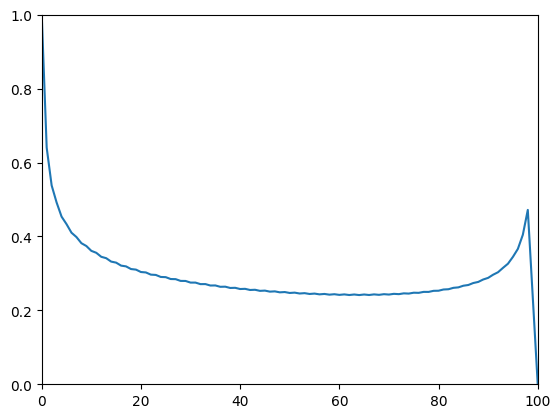

In [714]:
dat = []
ni = np.linspace(0,100,100,dtype=int)

for n in ni:

    N = np.array([i for i in range(0,n)])
    rows = [D(ni,uk,vk,k) for ni in N]
    cols = [D(-ni,uk,vk,k) for ni in N]
    dat+= [la.det(toeplitz(rows,cols))]
plot(ni,dat)
plt.ylim(0,1)
#plt.yscale("log")
plt.xlim(ni[0],ni[-1])

In [641]:
g=100000

uk = g-np.cos(k)+np.sqrt(g**2-2*g*np.cos(k)+1)
vk = np.sin(k)
norm = np.sqrt(uk**2+vk**2)
uk /= norm
vk /= norm
uk

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [625]:
def cc(u, v, k, n):  # ⟨c_i^† c_j^†⟩
    amp = np.conj(u) * np.conj(v)
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L

def aa(u, v, k, n):  # ⟨c_i c_j⟩
    amp = u * v
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L

def ca(u, v, k, n):  # ⟨c_i^† c_j⟩
    amp = np.abs(v)**2
    phase = np.exp(-1j * k * n)
    return np.sum(amp * phase) / L

def ac(u, v, k, n):  # ⟨c_i c_j^†⟩
    amp = np.abs(u)**2
    phase = np.exp(1j * k * n)
    return np.sum(amp * phase) / L


(0.0, 100.0)

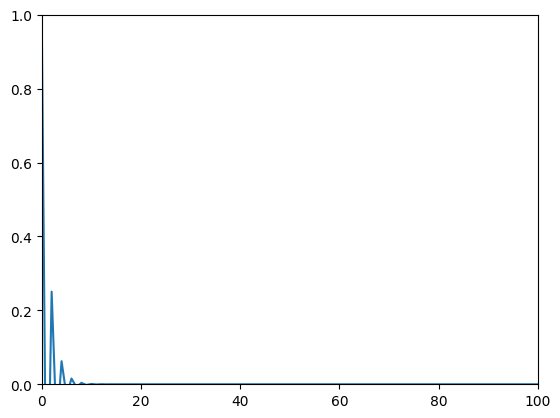

In [ ]:
def D(N,uk,vk,k):
    n = 1-N
    args = [uk,vk,n,k]
    return BA(args)

SECOND ATTEMPT


In [ ]:
def epsilon(k,g,J=1):
    return 2*J*np.sqrt( (g-np.cos(k))**2+np.sin(k)**2)

In [ ]:
def U(k, g):
    u = g - np.cos(k) + np.sqrt(g**2 - 2 * g * np.cos(k) + 1)
    v = np.sin(k)
    norm = np.sqrt(u**2 + v**2)
    return u / norm, v / norm
def ca(U, k, l):
    u, v = U
    amp = np.abs(v)**2
    phase = np.exp(1j * k * l)
    return np.sum(amp * phase) / L
def ac(U, k, l):
    u, v = U
    amp = np.abs(u)**2
    phase = np.exp(-1j * k * l)
    return np.sum(amp * phase) / L
def aa(U, k, l):
    u, v = U
    amp = np.conj(v) * u
    phase = np.exp(-1j * k * l)
    return -1j * np.sum(amp * phase) / L
def cc(U, k, l):
    u, v = U
    amp = np.conj(u) * v
    phase = np.exp(-1j * k * l)
    return 1j * np.sum(amp * phase) / L
def AA(args):
    return cc(*args)+ca(*args)+ac(*args)+aa(*args)
def BB(args):
    return aa(*args)-ac(*args)-ca(*args)+cc(*args)
def AB(args):
    return (-aa(*args)+ac(*args)-ca(*args)+cc(*args))
def BA(args):
    return (-aa(*args)-ac(*args)+ca(*args)+cc(*args))
def D(N,U,k):
    n = 1-N
    args = [U,k,n]
    return BA(args)

(0.0, 100.0)

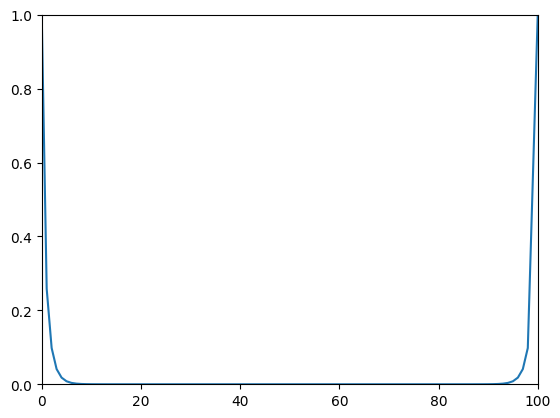

In [848]:
L = 100
n = 1
g = 2
        
k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )


dat = []
ni = np.linspace(0,100,100,dtype=int)
T = U(k,g)

for n in ni:

    N = np.array([i for i in range(0,n)])
    rows = [D(ni,T,k) for ni in N]
    cols = [D(-ni,T,k) for ni in N]
    dat+= [la.det(toeplitz(rows,cols))]
plt.plot(ni,dat)
plt.ylim(0,1)
#plt.yscale("log")
plt.xlim(ni[0],ni[-1])

In [857]:
from scipy.integrate import solve_ivp
import numpy as np
def h(t,tau,h0):
    return h0*(1-t/tau)

# Define RHS
def rhs(t, X, k, J, h,h0, tau):
    u, v = X
    hi = h(t, tau, h0)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]


In [949]:

L = 100
h0 = 10
J = 1.0
k = (2 * np.arange(-L//2, L//2) + 1) * np.pi / (L )
u0, v0 = U(k,h0)

taus = np.linspace(.1,50,10)
tau = 10
t_span = (0, tau)
t_eval = np.linspace(*t_span, 200)

ut=[]
vt=[]

for i in range(len(k)):
    k_i = k[i]
    y0 = np.array([u0[i], v0[i]], dtype=complex)
    sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval,args=(k_i, J, h, tau,h0))
    ut.append(sol.y[0])
    vt.append(sol.y[1])

(100, 200)

In [1097]:
from scipy.integrate import solve_ivp
import numpy as np

def h(t, tau, h0):
    return h0 * (1 - t / tau)

def rhs(t, X, k, J, h_func, h0, tau):
    u, v = X
    hi = h_func(t, tau, h0)
    du = -1j * (2 * J * (hi - np.cos(k)) * u + 2 * J * np.sin(k) * v)
    dv = -1j * (-2 * J * (hi - np.cos(k)) * v + 2 * J * np.sin(k) * u)
    return [du, dv]

def U(k, g):
    u = g - np.cos(k) + np.sqrt(g**2 - 2*g*np.cos(k) + 1)
    v = np.sin(k)
    norm = np.sqrt(u**2 + v**2)
    return u / norm, v / norm

# Parameters
L = 100
h0 = 5
J = 1.0
k_vals = (2 * np.arange(-L//2, L//2) + 1) * np.pi / L

tau_0 = 1/min(epsilon(k_vals,1))
ratios = np.linspace(0.5, 0.05, 20)  # or any number of points
taus = tau_0 / ratios


# Initial condition
u0, v0 = U(k_vals, h0)

# Allocate array: shape (2, L, T)
TRUST = []
DAT = []
for tau in taus:
    t_span = (0, tau)
    t_eval = np.linspace(*t_span, 100)
    U_t = np.zeros((2, L, len(t_eval)), dtype=complex)

    for i, k_i in enumerate(k_vals):
        y0 = np.array([u0[i], v0[i]], dtype=complex)
        sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval, args=(k_i, J, h, h0, tau), method='RK45',max_step=0.05)
        U_t[0, i, :] = sol.y[0]  # u_k(t)
        U_t[1, i, :] = sol.y[1]  # v_k(t)
    DAT.append(U_t)
    args = [U_t[:,:,-1],k_vals,1]
    TRUST.append(1-BA(args))

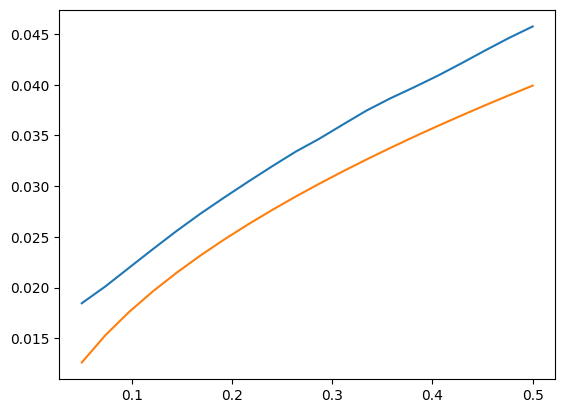

In [1098]:
plt.plot(tau_0/taus,np.array(TRUST)/2)
plt.plot(tau_0/taus,(2*taus)**(-1/2)/3.14)

In [ ]:
def sigma_general(indices,T,k):
    def remove_duplicates_in_pairs(vec):
      unique_vals, counts = np.unique(vec, return_counts=True)
      filtered_vals = unique_vals[counts % 2 != 0]
      return filtered_vals.tolist()
    #Sigma matrices on different sites commute
    indices = np.sort(indices)
    #Remove any duplicates as sigma_x^2 = 1
    indices = remove_duplicates_in_pairs(indices)

    #even = True
    even = False
    if len(indices)%2 == 1:
      if even ==True:
        return 0
      else:
        constant = L//4
        indices = list(indices) + [x + constant for x in indices]
        return np.sqrt(np.abs(sigma_general(indices,T,k)))
    
    #Bs sit on odd sites
    odd_sites = np.array(indices[::2])
    #As site on even sites
    even_sites= np.array(indices[1::2])
    #Get string lengths
    JW_string_lengths = even_sites-odd_sites
    #Sum of string lengths is size of matrix needed
    N = sum(JW_string_lengths)
    #Fill in indices for strings
    R = []
    for i in range(0, len(indices), 2):
        start = indices[i]
        end = indices[i+1]
        R.extend(range(start, end+1))

    A_coords = [x for x in R if x not in odd_sites]
    B_coords = [x for x in R if x not in even_sites]
    N = len(A_coords)

    # Compute first column: D(B_coords[0] - A_coords + 1)
    first_col = np.array([D(B_coords[0] - A_coords[j] + 1, T, k) for j in range(N)])

    # Compute first row: D(B_coords[i] - A_coords[0] + 1)
    first_row = np.array([D(B_coords[i] - A_coords[0] + 1, T, k) for i in range(N)])

    # Construct Toeplitz matrix
    C = toeplitz(first_col, first_row)

    return la.det(C)



# for n in ni:

#     N = np.array([i for i in range(0,n)])
#     rows = [D(ni,T,k) for ni in N]
#     cols = [D(-ni,T,k) for ni in N]
#     dat+= [la.det(toeplitz(rows,cols))]

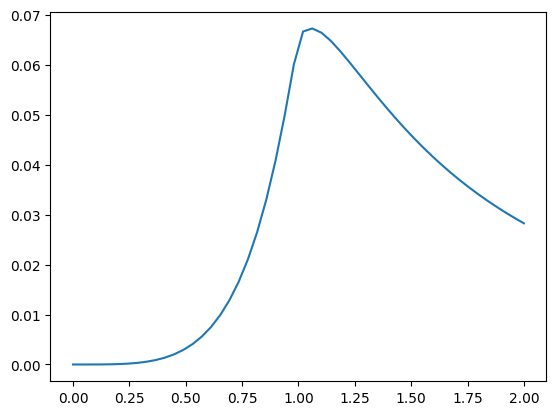

In [1211]:
h_v = np.linspace(0,2,50)


dat=[]
dat2=[]
for h in h_v:
    T = U(k_vals,h)    
    C = np.real((sigma_general([0,1],T,k_vals)))
    dat.append(C)
    C = np.real((sigma_general([0,1,2,3],T,k_vals)))
    dat2.append(C)
dat = np.array(dat)
dat2= np.array(dat2)

plot(h_v,np.log(dat2/(dat**2)))